### <center> Введение

**Очистка данных** (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: **поиск** и **ликвидация** (или редактирование).

*Цель* очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это *самая главная часть* этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.

В среднем при работе с данными очистка данных занимает около 40-60 % от общего времени работы с данными (включая построение модели).

Вспомните поговорку: **«мусор на входе — мусор на выходе».**

Данные почти всегда «грязные». В бизнес-задачах данные чаще всего представляют собой неструктурированный набор таблиц, в которых содержится куча всевозможного «мусора». 

Нам понадобятся данные из многих отделов, и все они будут представлены разными форматами: данные об активности пользователей на сайте — в виде *json*-формата, для данных из бухгалтерии типичен формат *excel*, данные о показателях развития мы достанем из *базы данных*. 

На руках у нас будет куча таблиц в разных форматах, которые необходимо грамотно объединить.

Для того чтобы «состряпать» большой и полезный датасет, необходимо отдельно обработать каждую из таблиц. В данных будет огромное количество «мусора»: начиная с несовпадающих периодов наблюдений (компания открылась раньше, чем её сайт), наименований категорий (различные названия отделов в каждой из таблиц) и пропущенных данных (мы могли потерять их в процессе выгрузки из базы), заканчивая некорректно введёнными значениями с парой лишних или недостающих нулей, которые по случайности вбила условная бухгалтер Алевтина Петровна

**Цели модуля:**

- Рассмотреть методы определения пропусков в данных и основные методики работы с ними.

- Познакомиться с методами поиска выбросов в данных и рассмотреть основные практики работы с ними.

- Научиться определять дубликаты и неинформативные признаки в данных и избавляться от них.

## <center> 2. Знакомство с новыми данными: данные о квартирах от Сбера

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import numpy as np

In [4]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [5]:
# Посмотрим дополнительно последние 5 строк
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [6]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [7]:
# Подсчитаем количество уникальных значений в столбце с районами
sber_data['sub_area'].nunique()

146

In [8]:
# Чему равна максимальная цена квартир
sber_data['price_doc'].max()

np.int64(111111112)

Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

In [9]:
# Сводная таблица с необходимыми данными
df = sber_data[['price_doc', 'ecology']].copy()

# Строим график
fig = px.box(
    data_frame=df,
    x='ecology',
    y='price_doc',
    title='Зависимость цены от экологической обстановки',
    points='outliers'
)

fig.show()

Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). 

Text(0, 0.5, 'Цена')

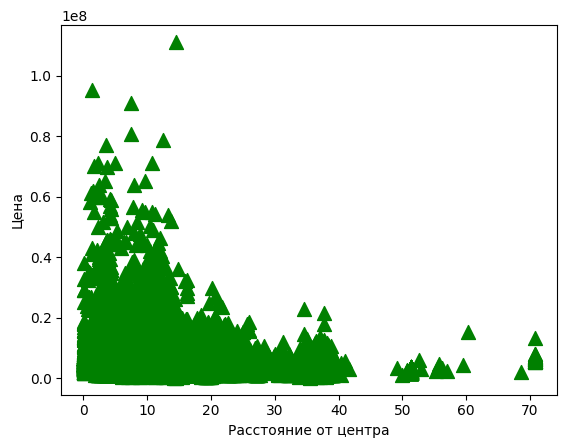

In [10]:
# Отбор данных
df = sber_data[['price_doc', 'kremlin_km']].copy()

# Строим график
fig = plt.scatter(
    data=df,
    x='kremlin_km',
    y='price_doc',
    s=100,
    marker='^',
    c='green',
    
)

plt.xlabel('Расстояние от центра')
plt.ylabel('Цена')

## <center> 3. Работа с пропусками: как их обнаружить?

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»). Преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку. 

**ПРИЧИНЫ ПОЯВЛЕНИЯ ПРОПУСКОВ В ДАННЫХ**

- **Ошибка ввода данных.** Как правило, такая ошибка обусловлена человеческим фактором: никто не застрахован от случайного пропуска графы при заполнении данных.

- **Ошибка передачи данных.** Эта причина на сегодняшний момент возникает довольно редко: с появлением протоколов проверки выгружаемой информации потерять данные при передаче их по сети становится сложнее, но вероятность такого события ненулевая.

- **Намеренное сокрытие информации.** Одна из самых распространённых причин, особенно в социологических опросах. Дело в том, что пользователи/опрашиваемые/клиенты часто скрывают информацию о себе. Например, люди, занимающие высокие должности, могут быть связаны контрактом о неразглашении своих доходов. 

- **Прямое отсутствие информации.** Эта причина очень распространена в данных для рекомендательных систем. Представьте, что у нас есть таблицы фильмов и пользователей, которые просматривают их и ставят им оценки. Мы объединяем всю информацию в одну большую сводную таблицу: например, по строкам идут пользователи, а по столбцам — фильмы. Но вот незадача: у нас нет информации о рейтингах фильмов, которые пользователь ещё не посмотрел. В таком случае на пересечении строки с именем пользователя и столбца с названием фильма, который он ещё не смотрел, ставится пропуск. Главное несчастье состоит в том, что 99 % процентов такой таблицы — это сплошной пропуск.

- **Мошенничество.** Очень острая проблема в финансовой сфере, особенно в банковских данных. Мошенники нередко указывают ложную информацию или не указывают её вовсе.

**КАК ОБНАРУЖИТЬ ПРОПУСКИ?**

Ранее мы определяли наличие пропусков в данных с помощью метода `info()`. Но этот метод не позволяет точно локализовать места пропущенных значений, он выводит **только число непустых значений** и предназначен для определения **факта наличия пропусков**

Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски скрыты.


(Ячейки с пропуском могут быть помечены специальным символом, например “?” или “no data”).

В библиотеке *pandas* специально для этого реализован метод `isnull()`. Этот метод возвращает новый *DataFrame*, в ячейках которого стоят булевы значения *True* и *False*. *True* ставится на месте, где ранее находилось значение *NaN*.

In [11]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Из таблицы можно увидеть, где были пропущены значения: ячейки со значением True; ячейки, где стоит False, были изначально заполнены.

**СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ**

**Первый способ** — это вывести на экран названия столбцов, где число пропусков больше 0.

Для этого вычислим средний по столбцам результат метода `isnull()`. Получим долю пропусков в каждом столбце.

*True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк.* 

In [12]:
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, 
# сортируем по убыванию и выводим результат:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Итак, можно увидеть, что у нас большое число пропусков (более 47 %) в столбце *hospital_beds_raion* (количество больничных коек в округе). 

Далее у нас идут столбцы с числом пропусков чуть больше 20 %: 

- *preschool_quota* (число мест в детском саду в районе);
- *school_quota* (число мест в школах в районе);
- *life_sq* (жилая площадь здания в квадратных метрах). 

Менее одного процента пропусков содержат признаки:

- *floor* (число этажей в доме);
- *metro_min_walk* (время от дома до ближайшего метро пешком в минутах);
- *metro_km_walk* (расстояние до ближайшего метро в километрах);
- *railroad_station_walk_km* (расстояние до ближайшей ж. д. станции в километрах);
- *railroad_station_walk_min* (время до ближайшей ж. д. станции пешком в минутах). 

*Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. Например, уже сейчас ясно, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации при прогнозировании. Если мы попытаемся его как-то исправить, мы можем только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться. А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.*

**СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ**

Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод `plot()`:

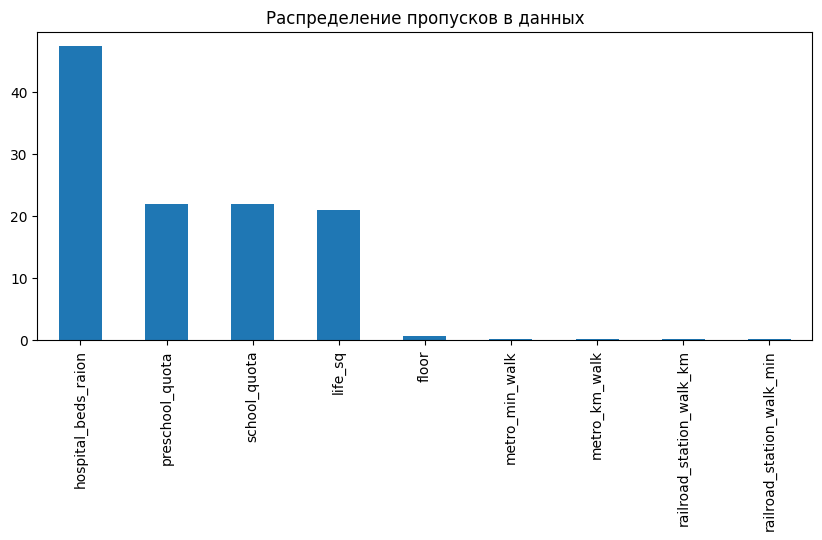

In [13]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

**ТЕПЛОВАЯ КАРТА ПРОПУСКОВ**

Её часто используют, когда **столбцов с пропусками не так много (меньше 10)**. Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

Для создания такой тепловой карты можно воспользоваться результатом метода `isnull()`. Ячейки таблицы, в которых есть пропуск, будем отмечать **жёлтым** цветом, а остальные — **синим**. Для этого создадим собственную палитру цветов тепловой карты с помощью метода `color_pallete()` из библиотеки *seaborn*.

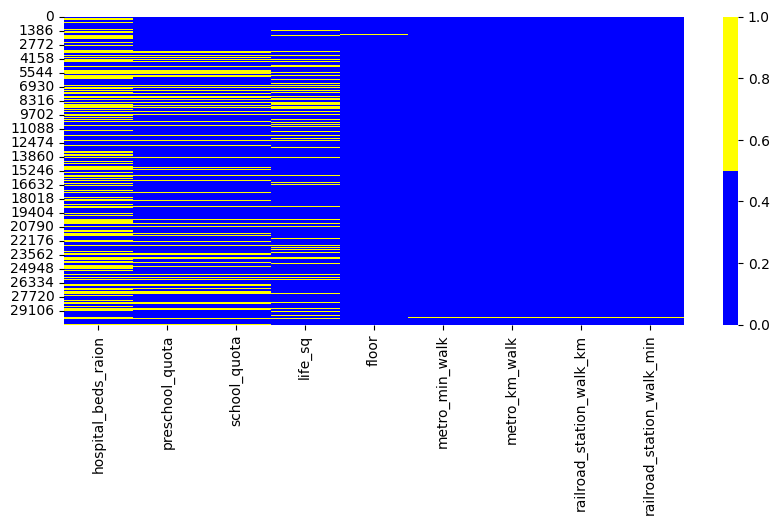

In [14]:
# Создадим палитру
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors)
)


На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако **мы можем увидеть места их концентрации в таблице**. Например, видно, что признаки `preschool_quota` и `school_quota` очень сильно связаны друг с другом по части пропусков: во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).

## <center> 4. Работа с пропусками: методы обработки

**Примечание:** *при записи скринкаста экспертом использовалась библиотека Pandas версии 1.3.4. Начиная с версии 1.5.0 в методе `dropna()` запрещено комбинировать использование параметров `how` и `thresh`. Актуальный вариант кода и более подробное объяснение вы можете найти в тексте ниже.*

##### <center>**МЕТОДЫ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ**

Все методы, которые мы рассмотрим, по сути являются простыми эвристиками, без математического обоснования. 

**ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ**

Первая техника — самая простая из всех. Она предполагает **простое удаление записей или признаков**, в которых содержатся пропуски. 

Здесь важно правильно выбрать ось удаления: если мы избавимся от большого числа строк, то рискуем потерять важные данные, а если мы удалим столбцы, то можем потерять важные признаки

*Схематически метод представлен на рисунке:*

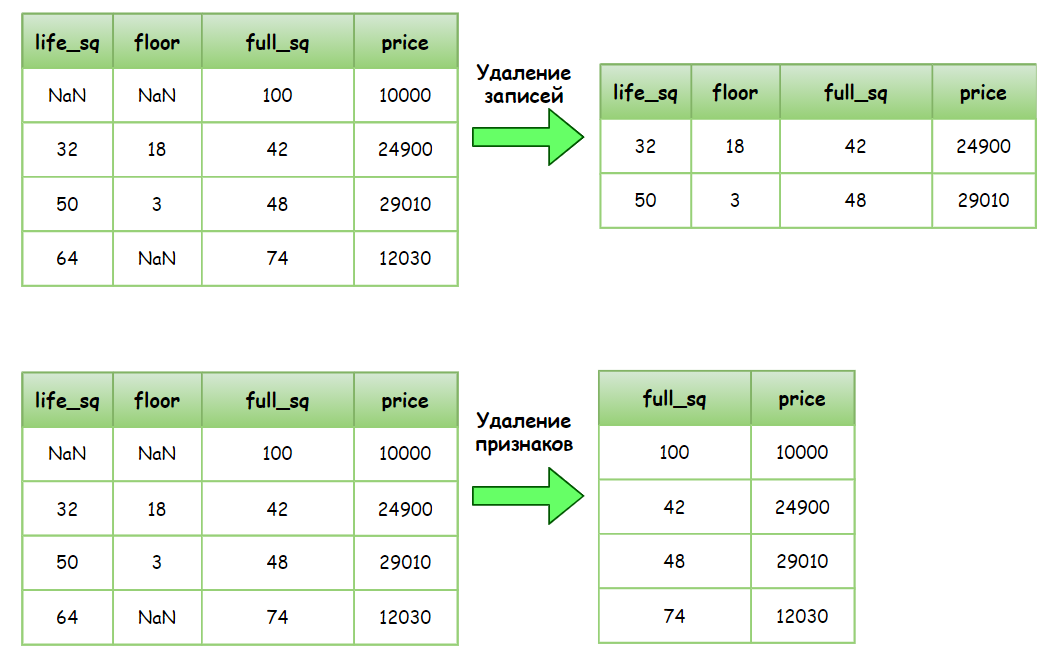

**Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил: удаляйте столбец, если число пропусков в нем более 30-40 %. В остальных случаях лучше удалять записи.**

Для удаления строк и столбцов будем использовать метод `dropna()`, который позволяет удалять пропуски с тонким подходом к настройке. 

**Основные параметры метода:**

- `axis` — ось, по которой производится удаление (по умолчанию 0 — строки).

- `how` — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 

- `thresh` — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем `n-2`, где  `n` — число признаков (если `axis=0`).

**Примечание**: Начиная с версии 1.5.0 Pandas запрещает одновременно устанавливать параметры `how` и `thresh`. При использовании этих параметров одновременно возникает ошибка:
**TypeError: You cannot set both the how and thresh arguments at the same time.**
Это связано с тем, что, например, если установить параметр **how='all'** и установить **thresh** в какое-то конкретное значение, то возникает противоречие: мы будем пытаться удалить столбцы/строки, одновременно при условии, что во всех столбцах/строках есть пропуски, но при этом стоит ограничение константой **thresh**. Метод `dropna()` не понимает, как действовать - какое ограничение принять за основное в таких случаях - и поэтому в новой версии библиотеки было решено запретить формирование таких условий.

In [15]:
# Предварительно создадим копию исходной таблицы, чтобы не повредить ее
drop_data = sber_data.copy()
# Задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
# Удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1) # Удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
# Отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [16]:
# Посмотрим на результирующее число записей
print(drop_data.shape) # shape - узнать размерность таблицы (строкиб столбцы)

(20888, 60)


**ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ**

Чтобы дырявая бочка не протекала, вставьте в дырку пробку. С этой мыслью связан другой способ бороться с пропусками — **заполнение константами**. 

Чаще всего пустые места заполняют **средним/медианой/модой для числовых** признаков и **модальным значением для категориальных** признаков. 

*Схема метода представлена на рисунке:*

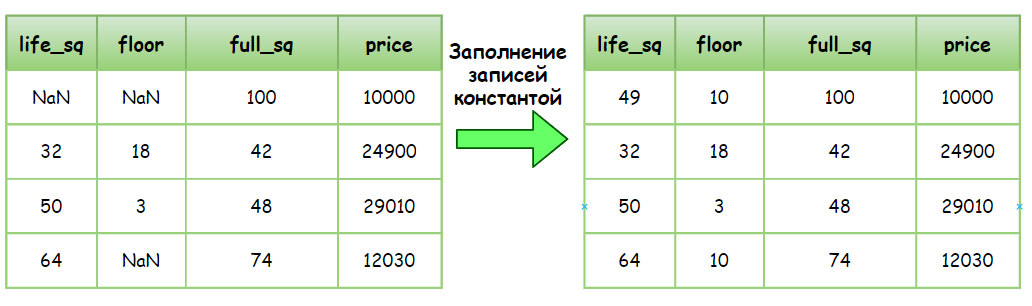

Вся сложность заключается в **выборе метода заполнения**. Важным фактором при выборе метода является распределение признаков с пропусками. Давайте выведем их на экран. 

В *pandas* это можно сделать с помощью метода `hist()`:

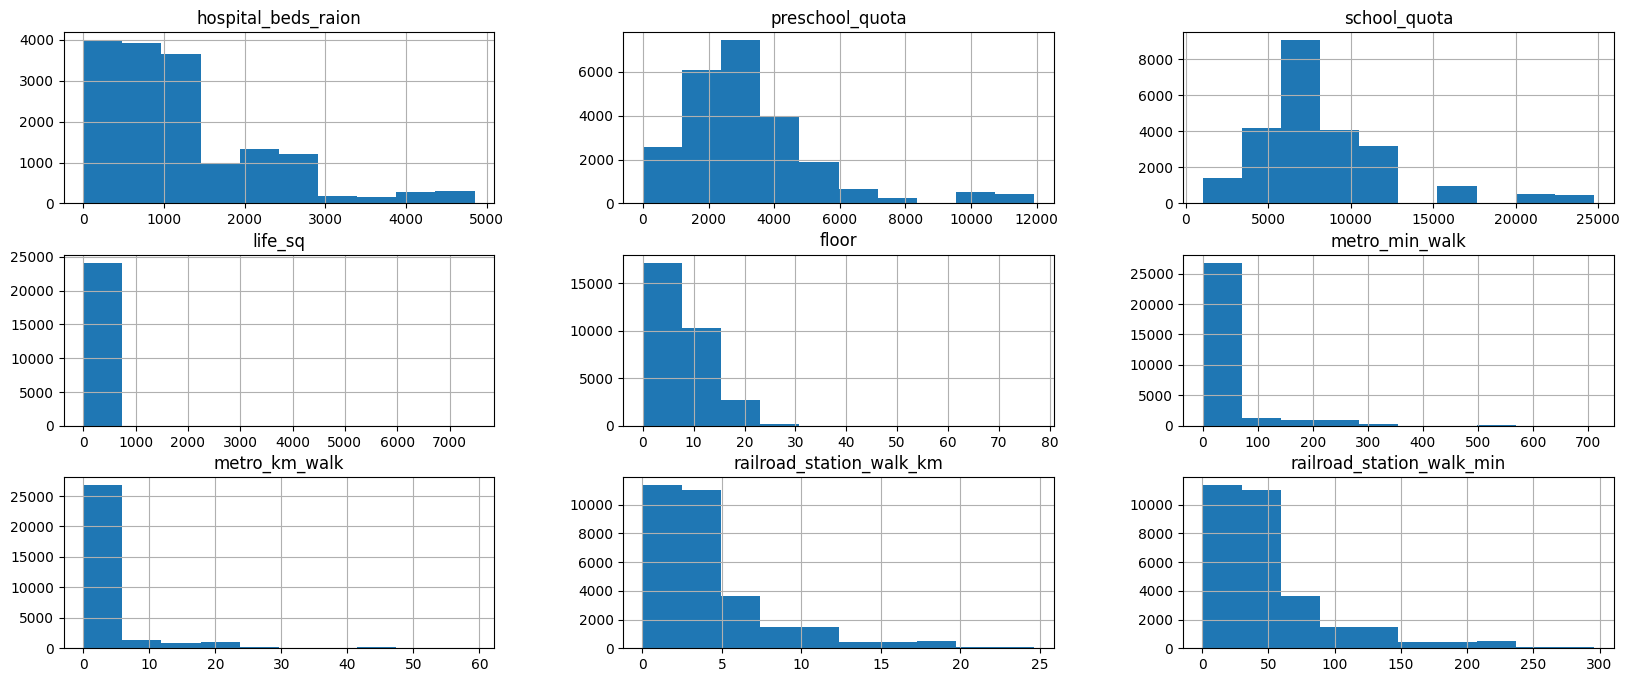

In [17]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

Итак, рассмотрим несколько **рекомендаций**.

- Для распределений, похожих на *логнормальное*, где пик близ нуля, а далее наблюдается **постепенный спад частоты**, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать **медианное** значение для таких признаков.

- Если признак **числовой и дискретный** (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак **заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану**.

- **Категориальные** признаки заполняются либо **модальным** значением, либо, если вы хотите оставить информацию о пропуске в данных, **значением 'unknown'**. На наше счастье, пропусков в категориях у нас нет.

- Иногда в данных **бывает такой признак, основываясь на котором, можно заполнить пропуски в другом**. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!

Заполнение значений осуществляется с помощью метода `fillna()`. Главный параметр метода — `value` (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего *DataFrame*, то в качестве `value` можно использовать словарь, где **ключи — названия столбцов** таблицы, а **значения** словаря — **заполняющие константы**. 

In [18]:
# Создаем копию исходной таблицы
fill_data = sber_data.copy()
# Создаем словарь 
# имя столбца: число(признак), на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}

#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

Посмотрим, на то, как изменились распределения наших признаков:

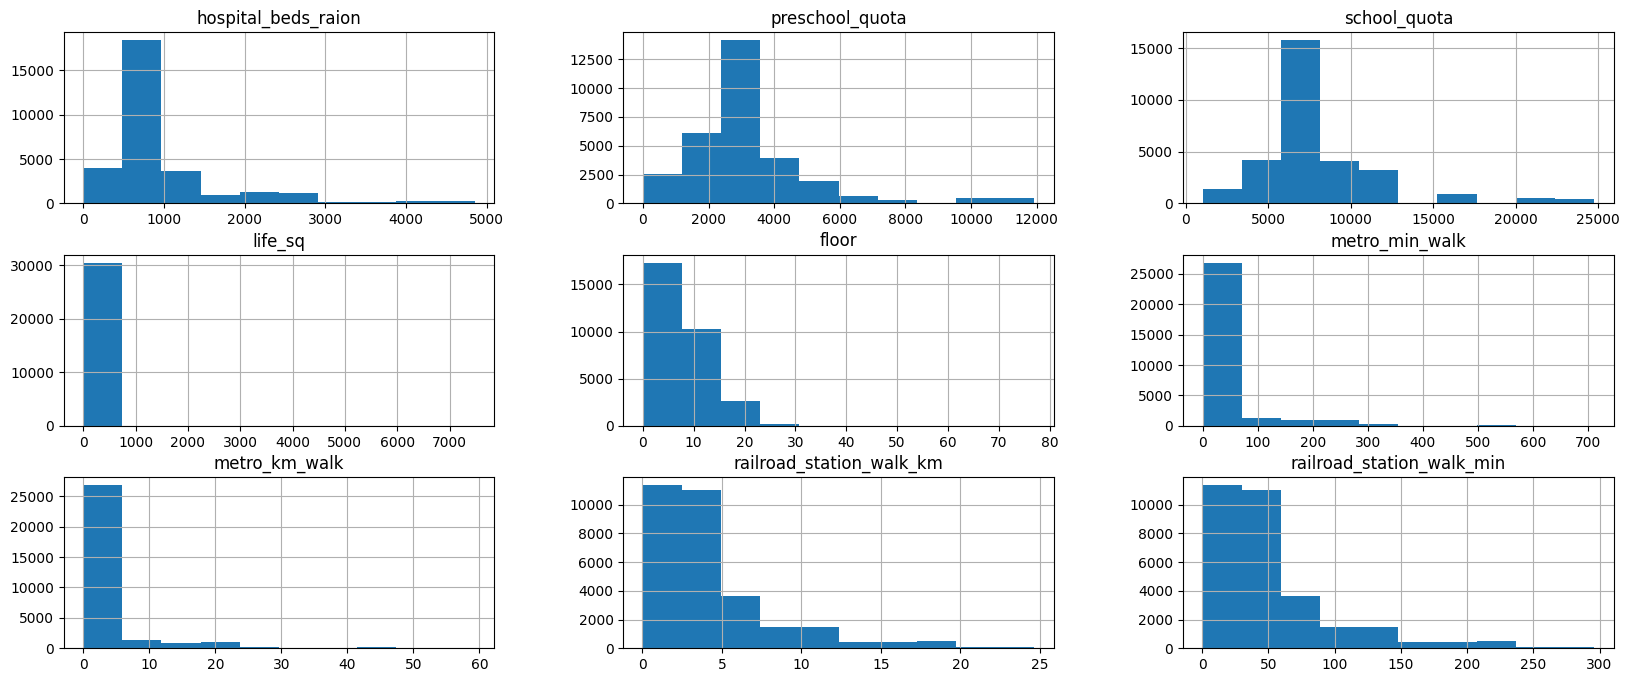

In [19]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

Обратите внимание на то, как сильно изменилось распределение для признака hospital_beds_raion. Это связано с тем, **что мы заполнили модальным значением почти 47 % общих данных.** В результате мы **кардинально исказили исходное распределение** признака, что может плохо сказаться на модели.

**Недостаток** метода заполнения константой состоит в том, что мы можем «нафантазировать» новые данные, которые не учитывают истинного распределения.

**ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА**

Добавим к нашим данным **признаки-индикаторы**, которые будут сигнализировать о том, что в столбце **на определённом месте в таблице был пропуск**. Это место в столбце-индикаторе будем помечать как *True*.

Эта эвристика пытается снизить влияние искажения признака, указав модели на места, где мы «нафантазировали» данные.

*Схематично метод можно представить следующим образом:*

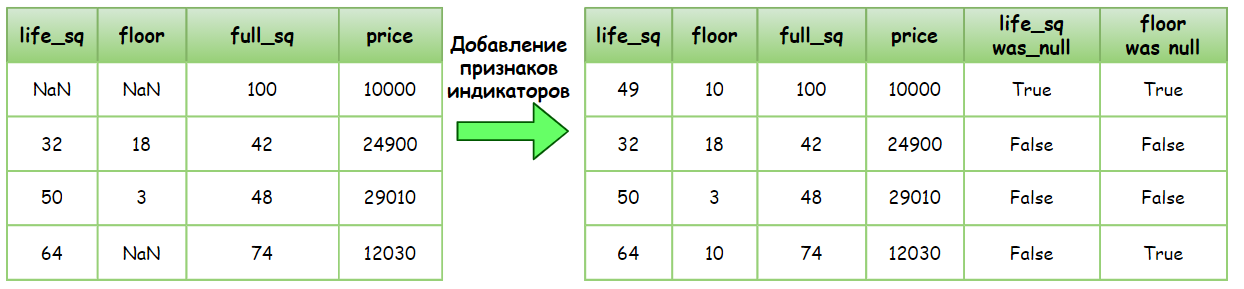

Посмотрим на реализацию. Как обычно, создадим копию `indicator_data` исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "`was_null`"), который получается из исходного с помощью применения метода `isnull()`. После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце, чтобы убедиться в результате:

In [20]:
# Создаем копию исходной таблицы
indicator_data = sber_data.copy()
# В цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    # Создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_nul'] = indicator_data[col].isnull()
# Создаем словарь
# имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}

# Заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
# Выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                   0.0
full_sq                              0.0
life_sq                              0.0
floor                                0.0
sub_area                             0.0
                                    ... 
floor_was_nul                        0.0
metro_min_walk_was_nul               0.0
metro_km_walk_was_nul                0.0
railroad_station_walk_km_was_nul     0.0
railroad_station_walk_min_was_nul    0.0
Length: 70, dtype: float64

Чтобы убедиться в добавлении признаков-индикаторов, выведем первые пять строк таблицы:

In [21]:
indicator_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_nul,preschool_quota_was_nul,school_quota_was_nul,life_sq_was_nul,floor_was_nul,metro_min_walk_was_nul,metro_km_walk_was_nul,railroad_station_walk_km_was_nul,railroad_station_walk_min_was_nul
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


*Метод исходит из предположения, что, **если дать модели информацию о том, что в ячейке ранее была пустота, то она будет меньше доверять таким записям и меньше учитывать её в процессе обучения**. Иногда такие фишки действительно работают, иногда не дают эффекта, а иногда и вовсе **могут ухудшить результат** обучения и затруднить процесс обучения.*

Когда мы добавляем признаки-индикаторы, мы **повышаем размерность наших данных**. Теперь представьте, что столбцов с пропусками сотня, по паре штук в каждом.

При увеличении размерности в данных время обучения некоторых моделей растет экспоненциально — увеличив число признаков в два раза, вы увеличите время обучения в 7.38 раза! И при этом, возможно, даже не получите прироста в качестве. 

**Проклятие размерности** гласит, что, увеличивая размерность функции, мы повышаем сложность поиска этого минимума и рискуем вовсе не найти его! Об этом страшном проклятии мы ещё будем говорить в курсе по ML и даже попробуем его победить. Но об этом чуть позже.

Этот метод часто используется в очистке данных.



**КОМБИНИРОВАНИЕ МЕТОДОВ**

Например, мы можем:

- удалить столбцы, в которых более 30 % пропусков;

- удалить записи, в которых более двух пропусков одновременно;

- заполнить оставшиеся ячейки константами.

In [22]:
# Создаем копию исходной таблицы
combine_data = sber_data.copy()

# Отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] # Число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

# Отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] # Число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

# Создаем словарь 
# 'имя столбца': число(признак), на который надо заменить пропуски
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]    
}

# Заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
# Выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

Выведем результирующее число строк и столбцов:

In [23]:
print(combine_data.shape)

(26800, 60)


**Примечание**. Стоит отметить, что предположение о том, что жилая площадь равна общей, слишком тривиально. Порассуждаем логически. Очевидно, что обычно в квартире есть хотя бы санузел, который не учитывается в жилой площади, и тогда жилая площадь будет меньше общей. Если взять соотношение жилой площади к общей площади и построить boxplot в log-масштабе, то медиана будет на около 0.6, а значение 1 (жилая = общая) не войдёт даже в последний квартиль. Поэтому в реальной задаче такая оценка соотношения площадей является не совсем корректной.

**РЕЗЮМЕ ПО МЕТОДАМ РАБОТЫ С ПРОПУСКАМИ**

Итак, мы рассмотрели основные методы решения проблемы с недостающей информацией, а также их недостатки. 

Ещё раз хотим подчеркнуть, что выбор метода или комбинации методов является исключительно вашим решением. Однако важно держать в голове несколько рекомендаций:

- Если какой-то из **признаков** имеет **более 30-40 % пропусков**, лучше **избавьтесь** от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных. Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», которыми вы закрываете пропуски, **выглядели правдоподобно**.

- Заполняйте данные с умом! Если перед вами **количественный** признак, то использование нецелого числа в качестве константы является как минимум нелогичным.

- Вы можете оставить пропуски как есть, просто **заменив их на какой-то специальный символ**. Например, *для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.*
Если вам позволяют сроки вашего проекта, попробуйте несколько кардинально разных подходов работы с пропусками.

**ДРУГИЕ МЕТОДЫ ЗАПОЛНЕНИЯ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ**

Существуют и другие популярные способы избавиться от дыр в данных. Приведём только идею методов и их краткое описание.

Например, можно предсказать пропуски с помощью **модели**. Такой подход основывается на том, что вы считаете признак с отсутствующими значениями целевым, а остальные признаки — факторами и строите модель, предсказывающую пропуски в данных. На практике часто для заполнения «дыр» в данных используют **метод ближайшего соседа (KNN) или линейную регрессию.**

Ещё один подход — **заполнение, основанное на группах**. Можно сгруппировать данные по некоторым признакам и заполнять константой, полученной в группе. Например, в наших данных для признака жилой площади можно было бы заполнять пропуски средней площадью квартир в районе.

**Задание 4.6**

Вам предоставлен файл test_data.csv. Прочитав этот файл, вы получите вот такой DataFrame:

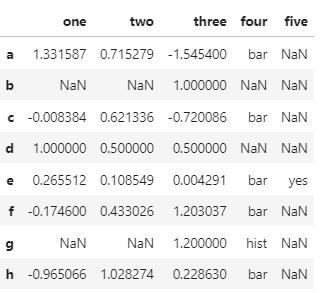

Ваша задача — очистить данную таблицу от пропусков следующим образом:

Если признак имеет больше 50% пропущенных значений, удалите его.
Для оставшихся данных: если в строке более двух пропусков, удалите строку.
Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой.
У вас должна получиться следующая таблица df:

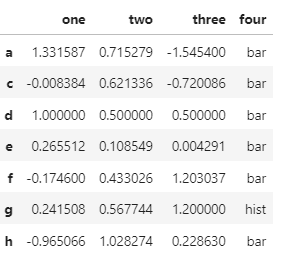

In [24]:
# Импортируем библиотеки
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.express as px

# Чтение файла
#df = pd.read_csv('test_data.csv')

# Удалить признак, если он имеет больше 50% пропущенных значений
#thresh = df.shape[0]*50
#df = df.dropna(thresh=thresh, axis=1)

# Для оставшихся: удалить строку, если в ней более двух пропусков
#n = df.shape[1] # Число признаков после удаления столбца
#df = df.dropna(thresh=n-2, axis=0)

# Для оставшихся: числовые признаки заполнить средним значением, 
# а категориальные — модой.

# Создаем словарь 
#values = {
    #'one': df['one'].mean(),
    #'two': df['two'].mean(),
    #'three': df['three'].mean(),
    #'four': df['four'].mode()[0]
#}

# Заполняем оставшиеся записи константами в соответствии со словарем
#df = df.fillna(values)

## <center> 5. Выбросы: почему появляются и чем опасны?

**Выброс (аномалия)** — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.

Выбросами могут быть как действительно *реальные отклонения* в данных (например, квартира в Москва-Сити за 2 млрд рублей выбивается из общего распределения, но она является вполне реальной), так и *просто ошибкой* (работа студента, оцененная в 8 баллов при наличии пятибалльной шкалы).

**Так или иначе, проблема выбросов состоит в том, что они могут «шокировать» модель.** 

**Модели** — это математические методы, которые оперируют числами и пытаются подстроить зависимости в данных, чтобы выдать верный ответ. Когда модель сталкивается с выбросом, она пытается подстроиться и под него. **В результате зависимость искажается, качество моделирования падает.** Иногда выбросов может быть так много, что модель и вовсе начинает выдавать какую-то белиберду. Такие модели, конечно, никому не нужны, поэтому специалисты особенно озадачены поиском аномалий в данных.

*Чаще всего выбросы либо исключают из данных, либо корректируют значения на что-то правдоподобное, либо, если выбросов много, создают специальный датасет и обучают модели для них отдельно.*

**ПРИЧИНЫ ПОЯВЛЕНИЯ ВЫБРОСОВ**

- **Ошибка ввода данных.** Как и с пропусками, здесь играет роль человеческий фактор. Ввести лишний «ноль» на клавиатуре и не заметить этого — нередкий случай.

- **Ошибки отбора выборки.** Когда начинающие специалисты составляют обучающую выборку для моделирования, они часто допускают ошибку, не выделив в отдельную группу часть данных. Типичный пример: смешать вместе данные об уровне жизни среднего класса, опрошенного на улице, и добавить туда людей из списка Forbes.

- **Преднамеренное искажение или мошенничество.** Пользователи приложения часто намеренно указывают неверные данные о себе. Например, прибавляют к своему возрасту лишнюю сотню лет, создавая головную боль дата-сайентистам.

Существует множество способов определить потенциальные выбросы. Какие-то из них основаны на простой логике, какие-то на математике, а некоторые и вовсе являются эвристиками. Проблема заключается в том, что ни один из методов не даёт никаких гарантий, поэтому необходимо проверять их результаты. Более того, используя разные методы, вы можете получить различных кандидатов на выбросы.

## <center> 6. Методы выявления выбросов

**МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА**

Это самый трудоёмкий метод, основанный на житейской логике, методе пристального взгляда и небольшом количестве статистики. Он предполагает поиск невозможных и нелогичных значений в данных.

Рассчитаем статистические показатели конкретного признака (минимум, максимум, среднее, квантили) и по ним попробуем определить наличие аномалий. 

Сделать это можно с помощью уже знакомого вам метода `describe()`. Рассчитаем статистические показатели для признака жилой площади (`life_sq`).

In [25]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Что нам говорит метод `describe()`? Во-первых, у нас есть квартиры с нулевой жилой площадью. Во-вторых, в то время как 75-й квантиль равен 43, максимум превышает 7 тысяч квадратных метров (целый дворец, а не квартира!).

In [26]:
# Найдем число квартир с нулевой площадью
print(sber_data[sber_data['life_sq'] == 0].shape[0])

45


Таких помещений оказывается 45 штук. Что это за зверь?

Это могут быть *апартаменты* — вид коммерческой недвижимости, которая юридически не является жилой площадью, но законно продаётся по ценам, сопоставимым с квартирными. Оставим их в покое.  

In [27]:
# Выведем теперь здания с жилой полщадью более 7000 кв м
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


Логичен вопрос: а много ли у нас таких квартир, у которых жилая площадь больше, чем суммарная?

Давайте проверим это с помощью фильтрации:

In [28]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. 

In [29]:
# Для удаления записей по индексам используем метод drop()
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


Ещё пример: давайте посмотрим на *признак числа этажей (floor)*.

In [30]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

Снова видим подозрительную максимальную отметку в 77 этажей.

In [31]:
# Проверим все квартиры, которые находятся выше 50 этажей
display(sber_data[sber_data['floor'] > 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Всего одна квартира в Ломоносовском районе. Пора идти в интернет в поиске самых высоких зданий в Москве! 

Убеждаемся в том, что здания выше 70 этажей находятся на территории комплекса Москва-Сити (Пресненский район). В Ломоносовском районе таких жилых высоток нет. Получается, что данное наблюдение — выброс.

Однако бывают данные, где необходимо углубиться в предметную область, чтобы понять, что наблюдения являются «сверхъестественными».

**МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)**

Отличным **помощником** в поиске потенциальных выбросов является **визуализация**. Если признак является **числовым**, то можно построить **гистограмму или коробчатую диаграмму**, чтобы найти аномалии.

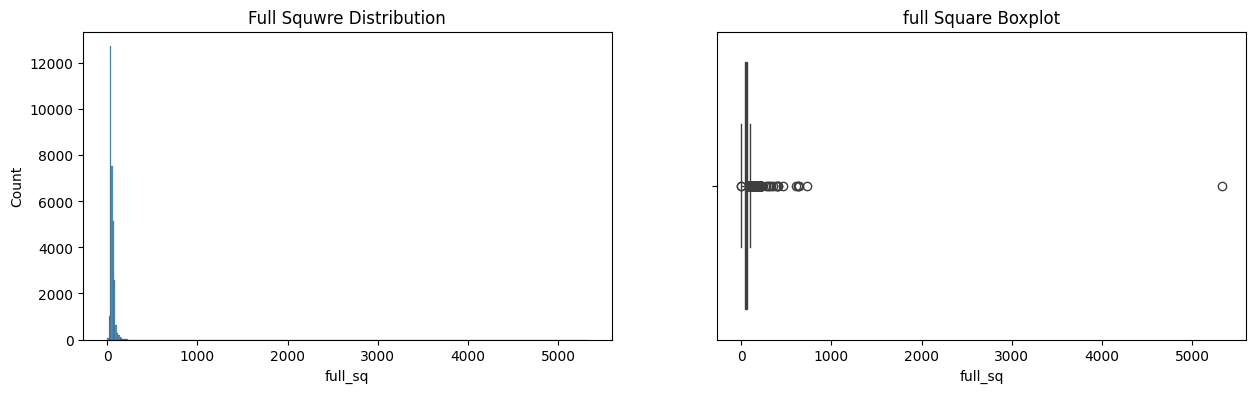

In [32]:
# Построим гистограмму и коробчатую диаграмму 
# для признака полной площади (full_sq)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Гистограмма
histplot = sns.histplot(
    data=sber_data,
    x='full_sq',
    ax=axes[0]
);
histplot.set_title('Full Squwre Distribution')

# Коробчатая диаграмма
boxplot = sns.boxplot(
    data=sber_data,
    x='full_sq',
    ax=axes[1]
);
boxplot.set_title('full Square Boxplot');

Врага нужно знать в лицо! Запомните эти картинки: **именно так выглядят типичные графики распределений с выбросами в данных.** Гистограмма, реализованная в *seaborn*, автоматически выбирает число столбцов, необходимое для наилучшей визуализации распределения. Когда признак содержит выбивающиеся значения, число столбцов становится очень велико и в итоге получается такая «кракозябра». 

По этой же причине получается сплюснутая под весом выбросов коробчатая диаграмма. Она помогает более чётко увидеть потенциальные аномалии, которые находятся за пределами усов (1.5 межквартильных размаха).

Визуализация помогает определить **наличие выбросов**. Для того чтобы их найти, можно воспользоваться статистическими подходами. 

Одним из таких подходов является **метод межквартильного размаха** (его еще называют **методом Тьюки**), *который используется для построения коробчатой диаграммы*.

**Алгоритм метода:**

→ вычислить 25-ый и 75-ый квантили (первый и третий квартили) — Q25 и Q75 для признака, который мы исследуем;

→ вычислить межквартильное расстояние: IQR=Q75-Q25;

→ вычислить верхнюю и нижнюю границы Тьюки: 
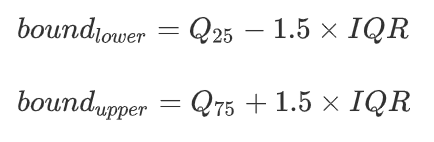

→ найти наблюдения, которые выходят за пределы границ
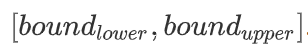


В соответствии с этим алгоритмом напишем функцию `outliers_iqr()`, которая вам может ещё не раз пригодиться в реальных задачах. Эта функция **принимает на вход** ***DataFrame* и признак**, по которому ищутся выбросы, а затем **возвращает** **потенциальные выбросы**, найденные с помощью *метода Тьюки*, **и очищенный от них датасет.**

Квантили вычисляются с помощью метода `quantile()`. Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

In [33]:
def outliers_iqr(data, feature): # Датасет и признак, по которому ищутся выбросы
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned # Возвращает выбросы и чистый датасет

Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов:

In [34]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
результирующее число записей: 29508


Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных `cleaned_sber_data`

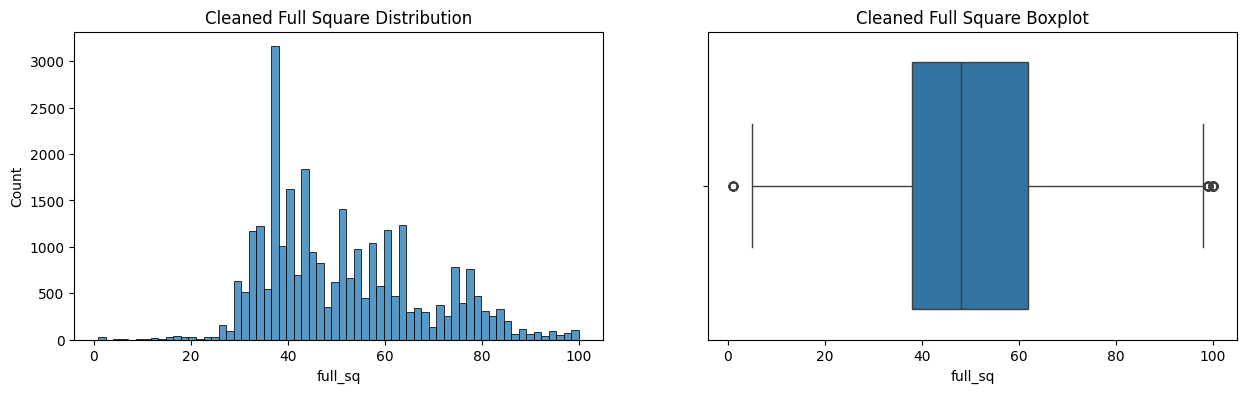

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Гистограмма 
histplot = sns.histplot(
    data=cleaned,
    x='full_sq',
    ax=axes[0]
);
histplot.set_title('Cleaned Full Square Distribution');

# Коробка
boxplot = sns.boxplot(
    data=cleaned,
    x='full_sq',
    ax=axes[1]
);
boxplot.set_title('Cleaned Full Square Boxplot');


На первый взгляд — стерильно. Однако если присмотреться, то коробчатая диаграмма всё ещё продолжает говорить, что в данных есть одиночные выбросы с обеих сторон от границ. К тому же у нас сильно урезался диапазон жилой площади — максимальная площадь составляет около 100 кв. м. 

?
Как же так, неужели метод не работает?

Причина кроется в том, что после удаления выбросов квартили рассчитываются заново по новым данным, и так оказалось, что из-за свойств распределения были снова найдены точки, которые считаются выбросами.

Классический метод межквартильного размаха не учитывает особенностей распределения! **Он требует, чтобы данные были распределены плюс-минус нормально (гистограмма должна быть похожа на колокол) и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).**

**Задание 6.1**

Давайте немного модифицируем функцию `outliers_iqr(data, feature)`. Добавьте в неё параметры `left` и `right`, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный *DataFrame*.

Назовите измененную функцию: `outliers_iqr_mod``

Можете протестировать работу функции на DataFrame `test_sber_data.csv`.

In [36]:
#import pandas as pd
#import numpy as np

#def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
#    if isinstance(data, str):  # Проверка, если передан путь к файлу
#        data = pd.read_csv(data)

 #   x = data[feature]
 #   quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
 #   iqr = quartile_3 - quartile_1
 #   lower_bound = quartile_1 - (iqr * left)
 #   upper_bound = quartile_3 + (iqr * right)

 #   outliers = data[(x < lower_bound) | (x > upper_bound)]
 #   cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
  #  return outliers, cleaned
 # Возвращает выбросы и чистый датасет

**Задание 6.2**

Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию `outliers_iqr_mod()` к признаку `full_sq` из таблицы `sber_data` данным с параметрами `left=1` и `right=6`. Результаты работы поместите в переменные `outliers` и `cleaned`. Чему равно результирующее число выбросов в данных?

In [39]:
def outliers_iqr_mod(data, feature, left, right):
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)

    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(f'Число выбросов по методы Тьюки: {outliers.shape[0]}')
print(f'Результирующие число записей: {cleaned.shape[0]}')


Число выбросов по методы Тьюки: 59
Результирующие число записей: 30412
